# Time Series

https://en.wikipedia.org/wiki/Time_series



- In mathematics, a time series is a series of data points indexed (or listed or graphed) in time order.


- Most commonly, a time series is a sequence taken at successive equally spaced points in time. 
- Thus it is a sequence of discrete-time data. 
- Examples of time series are heights of ocean tides, counts of sunspots, and the daily closing value of the Dow Jones Industrial Average.


- A time series is very frequently plotted via a run chart (which is a temporal line chart).


- Time series are used in statistics, signal processing, pattern recognition, econometrics, mathematical finance, weather forecasting, earthquake prediction, electroencephalography, control engineering, astronomy, communications engineering, and largely in any domain of applied science and engineering which involves temporal measurements.



- Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data. 


- Time series forecasting is the use of a model to predict future values based on previously observed values. 
- While regression analysis is often employed in such a way as to test relationships between one or more different time series, this type of analysis is not usually called "time series analysis", which refers in particular to relationships between different points in time within a single series.



- Time series data have a natural temporal ordering.
- This makes time series analysis distinct from cross-sectional studies, in which there is no natural ordering of the observations (e.g. explaining people's wages by reference to their respective education levels, where the individuals' data could be entered in any order).


- Time series analysis is also distinct from spatial data analysis where the observations typically relate to geographical locations (e.g. accounting for house prices by the location as well as the intrinsic characteristics of the houses). 



- A stochastic model for a time series will generally reflect the fact that observations close together in time will be more closely related than observations further apart. 
- In addition, time series models will often make use of the natural one-way ordering of time so that values for a given period will be expressed as deriving in some way from past values, rather than from future values (see time reversibility).



## Methods for analysis

- Methods for time series analysis may be divided into two classes: 
    - frequency-domain methods 
    - time-domain methods
    
- The former include spectral analysis and wavelet analysis; the latter include auto-correlation and cross-correlation analysis.
- In the time domain, correlation and analysis can be made in a filter-like manner using scaled correlation, thereby mitigating the need to operate in the frequency domain.


- Additionally, time series analysis techniques may be divided into parametric and non-parametric methods. 
- The parametric approaches assume that the underlying stationary stochastic process has a certain structure which can be described using a small number of parameters (for example, using an autoregressive or moving average model).


- In these approaches, the task is to estimate the parameters of the model that describes the stochastic process. 
- By contrast, non-parametric approaches explicitly estimate the covariance or the spectrum of the process without assuming that the process has any particular structure.


- Methods of time series analysis may also be divided into linear and non-linear, and univariate and multivariate.

## Panel data

- A time series is one type of panel data.
- Panel data is the general class, a multidimensional data set, whereas a time series data set is a one-dimensional panel (as is a cross-sectional dataset). 


- A data set may exhibit characteristics of both panel data and time series data. 
- One way to tell is to ask what makes one data record unique from the other records. 
- If the answer is the time data field, then this is a time series data set candidate.
- If determining a unique record requires a time data field and an additional identifier which is unrelated to time (e.g. student ID, stock symbol, country code), then it is panel data candidate.
- If the differentiation lies on the non-time identifier, then the data set is a cross-sectional data set candidate.

In [173]:
import warnings
warnings.filterwarnings("ignore")

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 6)


# Problem Statement : 

- data scientist at a mobile manufacturing company
- forecast their future sales for better planning and revenue . 

    1. want to undertand the pattern in demand  to be able to better plan for factory maintenance / staffing requirements. 
    2. need a certain level of accuracy. the management requires that the mean absolute percentage error is not more than 5%. 
    3. need a range forecast to supplement the point forecast to make ecuated trade off wherever needed. 

In [175]:
mobile_sales = pd.read_excel('mobilesales.xlsx')


## Forecasting: 

    Y0 , Y1 , Y2 , .... , Yt , Yt-1,  Yt,  Yt+1 ... 
    
    
    
    data looks like:         
      Y : ---------------------|----|----|[-----]           time-axis 
               y-train          y-val      y_hat 
                                y-test    (predicted)

In [176]:
mobile_sales.head(10)

,DATE,Sales
0,2001-01-01,6519.0
1,2001-02-01,6654.0
2,2001-03-01,7332.0
3,2001-04-01,7332.0
4,2001-05-01,8240.0
5,2001-06-01,8104.0
6,2001-07-01,7813.0
7,2001-08-01,8279.0
8,2001-09-01,7014.0
9,2001-10-01,7985.0


In [177]:
mobile_sales.dtypes

DATE     datetime64[ns]
Sales           float64
dtype: object

In [178]:
mobile_sales["Sales"].describe()

count      198.000000
mean     10842.757576
std       2605.006293
min        108.000000
25%       8856.000000
50%      10745.000000
75%      12399.750000
max      23740.000000
Name: Sales, dtype: float64

In [179]:
mobile_sales["DATE"].describe()

count                     217
unique                    217
top       2001-01-01 00:00:00
freq                        1
first     2001-01-01 00:00:00
last      2019-01-01 00:00:00
Name: DATE, dtype: object

In [180]:
mobile_sales["DATE"].min(),mobile_sales["DATE"].max()

(Timestamp('2001-01-01 00:00:00'), Timestamp('2019-01-01 00:00:00'))

In [181]:
(mobile_sales["DATE"].max()-mobile_sales["DATE"].min()) / np.timedelta64(1,"M")

215.9880079673094

In [182]:
(mobile_sales["DATE"].max()-mobile_sales["DATE"].min()) / np.timedelta64(1,"Y")

17.99900066394245

In [183]:
# 18 years of data. 
17.99900066394245*12

215.9880079673094

In [184]:
217-215.988
# approx 12 months of data missing ! 
# lets check 

1.0120000000000005

In [185]:
mobile_sales.isna().sum()

DATE      0
Sales    19
dtype: int64

In [186]:
mobile_sales.head()

,DATE,Sales
0,2001-01-01,6519.0
1,2001-02-01,6654.0
2,2001-03-01,7332.0
3,2001-04-01,7332.0
4,2001-05-01,8240.0


In [187]:
mobile_sales.set_index("DATE",inplace=True)

In [188]:
mobile_sales.head(20)

,Sales
DATE,
2001-01-01,6519.0
2001-02-01,6654.0
2001-03-01,7332.0
2001-04-01,7332.0
2001-05-01,8240.0
2001-06-01,8104.0
2001-07-01,7813.0
2001-08-01,8279.0
2001-09-01,7014.0


<AxesSubplot:xlabel='DATE'>

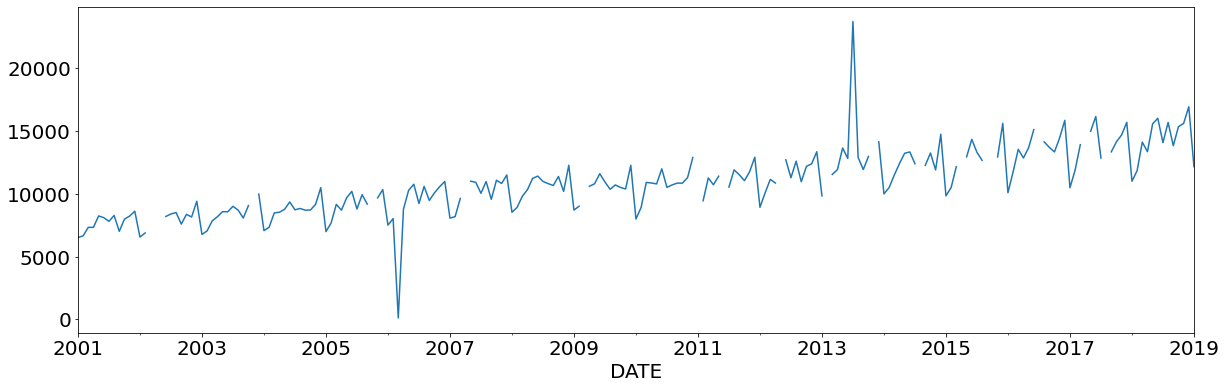

In [189]:
mobile_sales["Sales"].plot()


In [190]:
# there are two spikes in upper and lower side. -OUTLIERS
# and ther are missing data


<AxesSubplot:xlabel='DATE'>

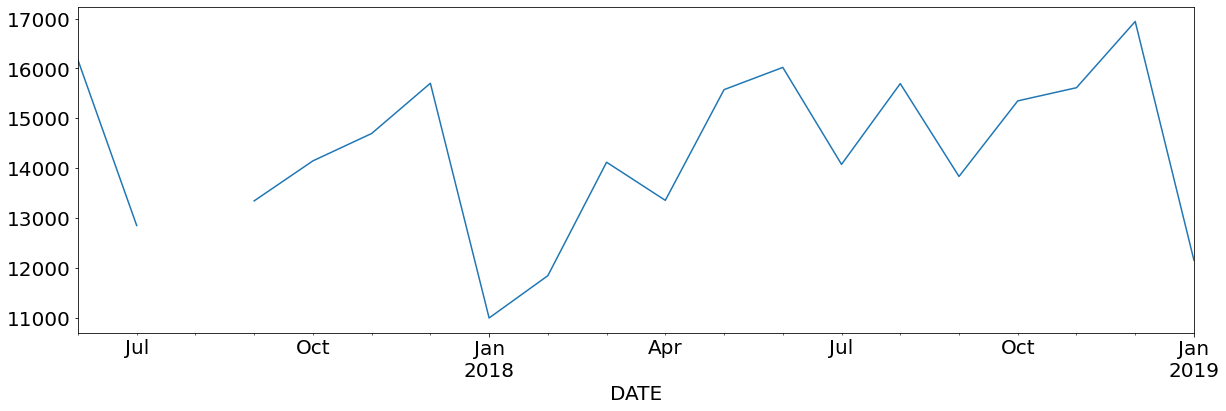

In [191]:
mobile_sales["Sales"].tail(20).plot()

In [192]:
# imputing missing with 0

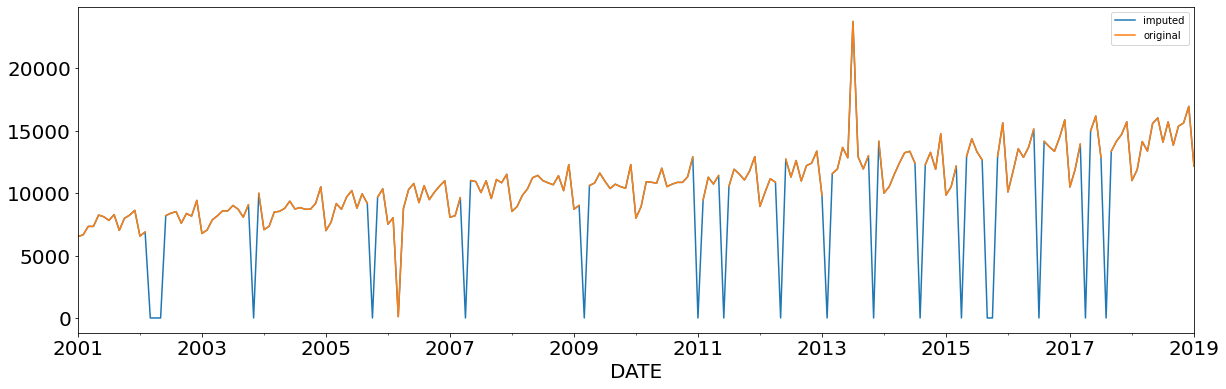

In [193]:
mobile_sales.Sales.fillna(0).plot(label='imputed')
mobile_sales.Sales.plot(label='original')
plt.legend()

In [194]:
df = mobile_sales.copy()


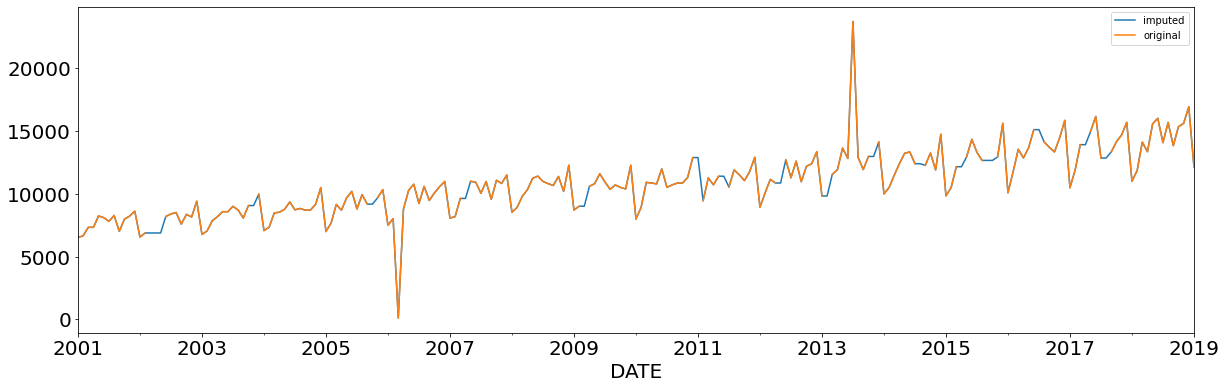

In [195]:
# Forward Fill 
# df.ffill().plot()

df.ffill()["Sales"].plot(label='imputed')
df["Sales"].plot(label='original')
plt.legend()



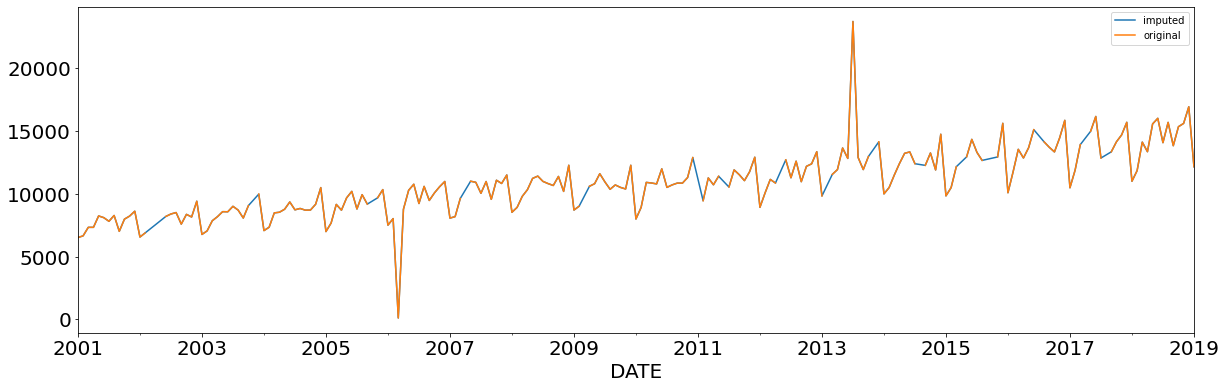

In [196]:
# interpolating missing values

df.interpolate(method="linear",limit_direction="forward")["Sales"].plot(label='imputed')
df["Sales"].plot(label='original')
plt.legend()



In [197]:
df = df.interpolate(method="linear",limit_direction="forward")
df 


,Sales
DATE,
2001-01-01,6519.0
2001-02-01,6654.0
2001-03-01,7332.0
2001-04-01,7332.0
2001-05-01,8240.0
...,...
2018-09-01,13838.0
2018-10-01,15351.0
2018-11-01,15615.0


<AxesSubplot:xlabel='DATE'>

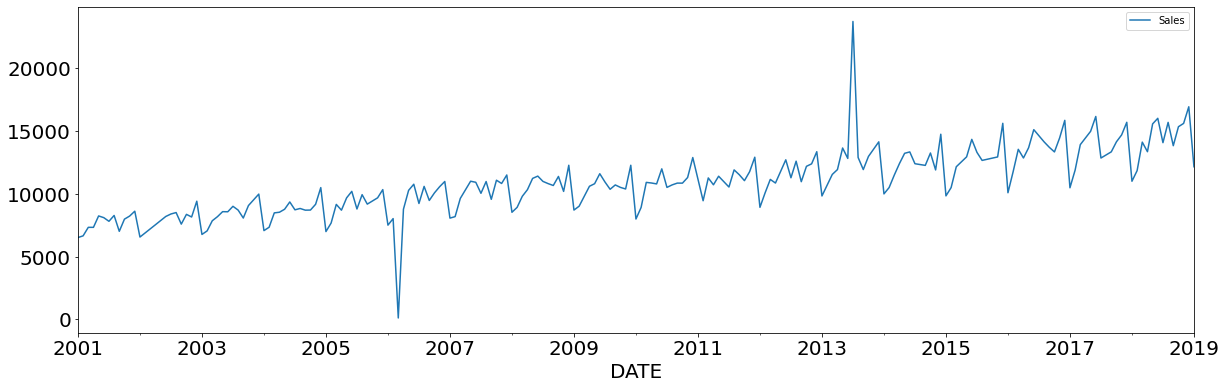

In [198]:
df.plot()

In [199]:
df.isna().sum()

Sales    0
dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Sales', ylabel='Count'>

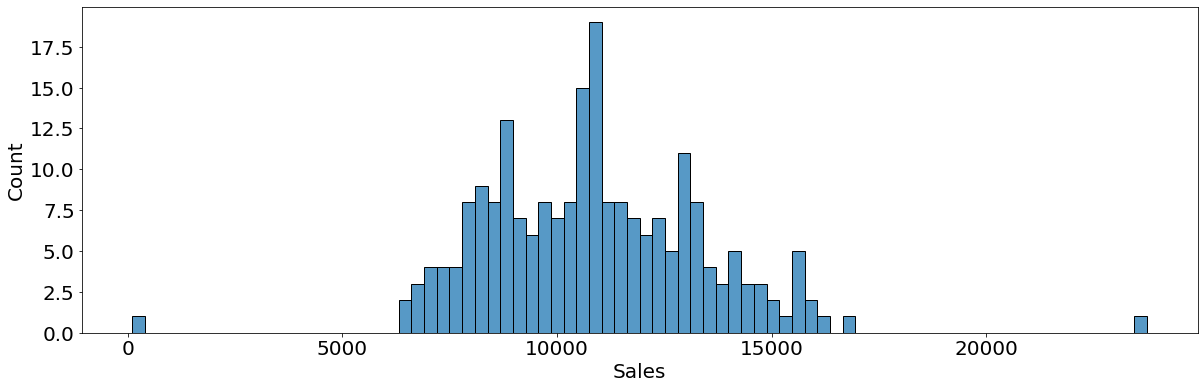

In [200]:
sns.histplot(df["Sales"],bins=80)

<AxesSubplot:xlabel='DATE'>

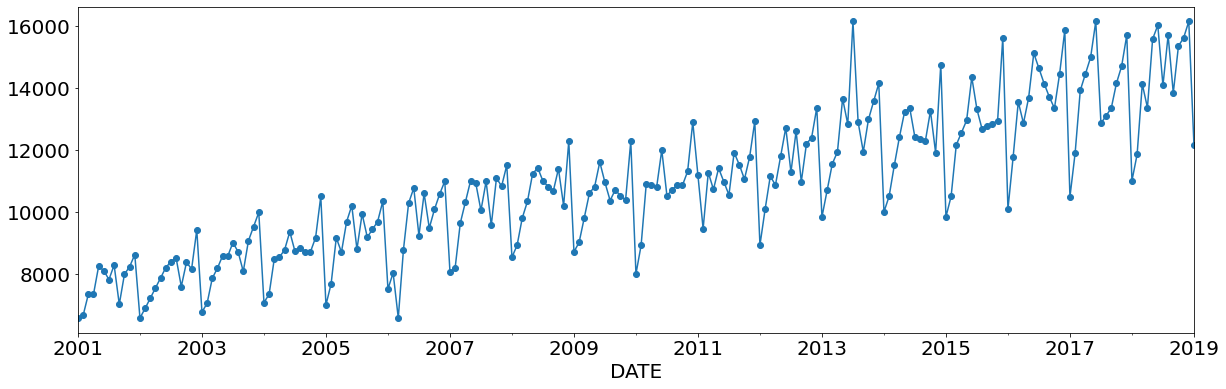

In [201]:
mobile_sales = pd.read_excel('mobilesales.xlsx')
mobile_sales.set_index('DATE', inplace=True)
mobile_sales.Sales = mobile_sales.Sales.interpolate()
mobile_sales.Sales = mobile_sales.Sales.clip(upper=mobile_sales.Sales.quantile(0.99), lower=mobile_sales.Sales.quantile(0.01))
mobile_sales.Sales.plot(style='-o')

In [202]:
# df.plot(style="-o")

<AxesSubplot:xlabel='DATE'>

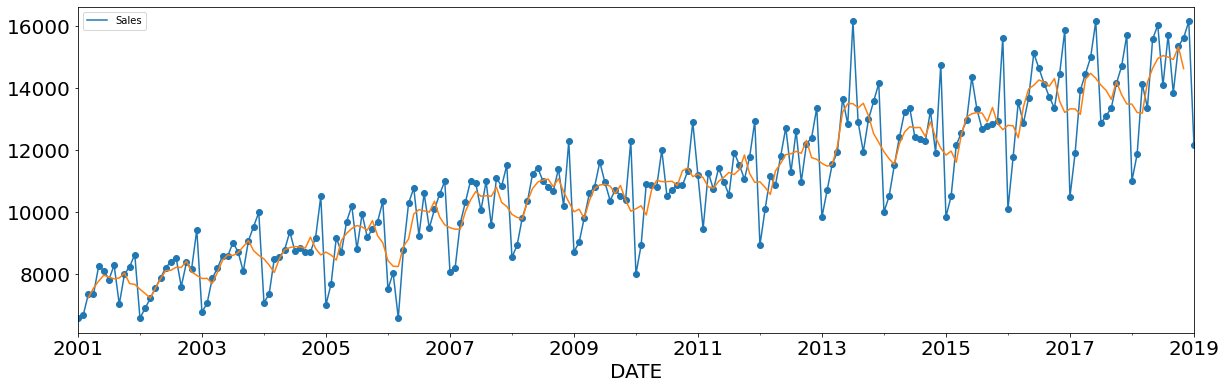

In [203]:
mobile_sales.plot(style="-o")
mobile_sales["Sales"].rolling(5,center=True).mean().plot()

<AxesSubplot:xlabel='DATE'>

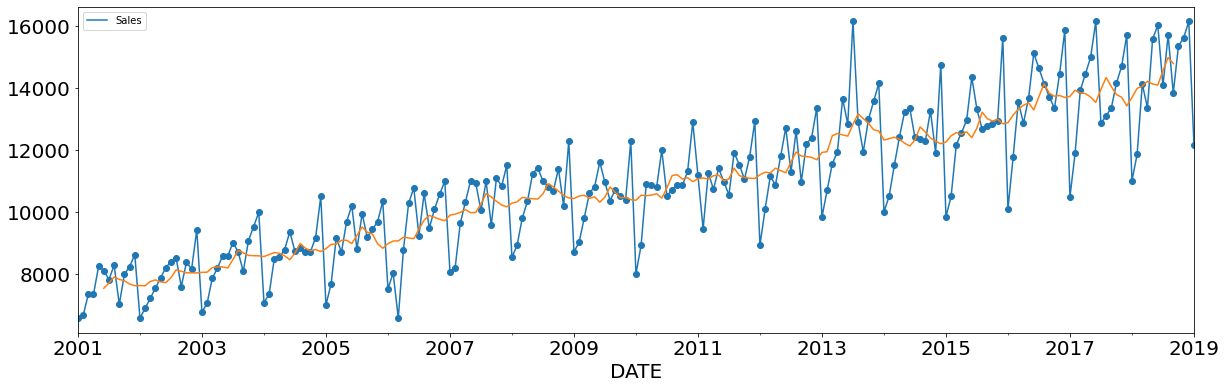

In [204]:
mobile_sales.plot(style="-o")
mobile_sales["Sales"].rolling(10,center=True).mean().plot()

<AxesSubplot:xlabel='DATE'>

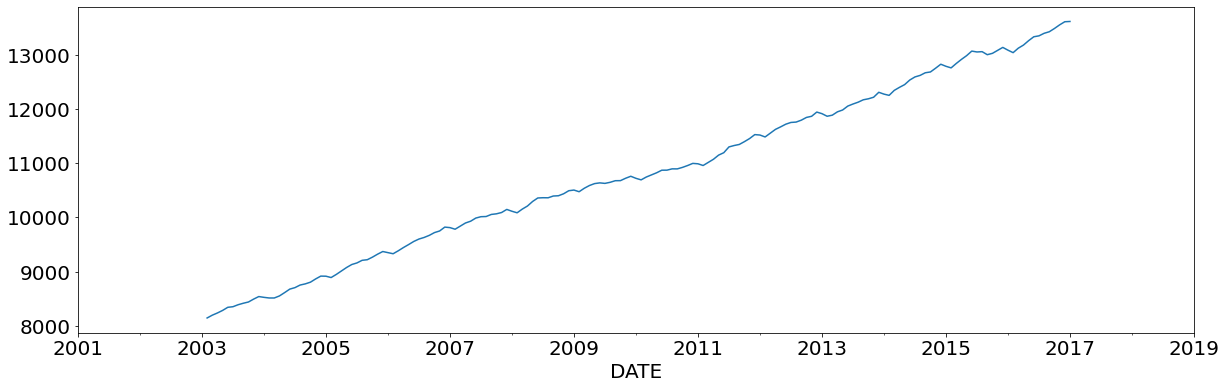

In [205]:
mobile_sales["Sales"].rolling(50,center=True).mean().plot()

<AxesSubplot:xlabel='DATE'>

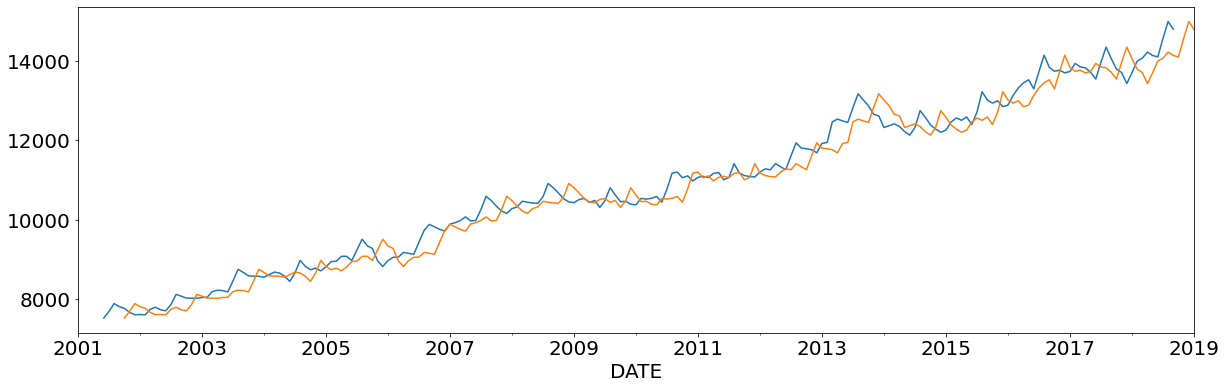

In [206]:
# centered moving average
mobile_sales["Sales"].rolling(10,center=True).mean().plot()
# forward moving average
mobile_sales["Sales"].rolling(10,center=False).mean().plot()

# Components of time series : 

- Decomposition procedures are used in time series to describe the trend and seasonal factors in a time series. 
- More extensive decompositions might also include long-run cycles, holiday effects, day of week effects and so on. Here, we’ll consider trend and seasonal decompositions.


- One of the main objectives for a decomposition is to estimate seasonal effects that can be used to create and present seasonally adjusted values.
- A seasonally adjusted value removes the seasonal effect from a value so that trends can be seen more clearly.




#### Basic Structures

- The following two structures are considered for basic decomposition models:

##### Additive: 
- = Trend + Seasonal + Random(error)

##### Multiplicative: 
- = Trend * Seasonal * Random(error)

- The “Random” term is often called “Irregular” in software for decompositions.



######  How to Choose Between Additive and Multiplicative Decompositions
- The additive model is useful when the seasonal variation is relatively constant over time.
- The multiplicative model is useful when the seasonal variation increases over time.

##### Example : 

- we looked at quarterly beer production in Australia. 
- The seasonal variation looked to be about the same magnitude across time, so an additive decomposition might be good. Here’s the time series plot:
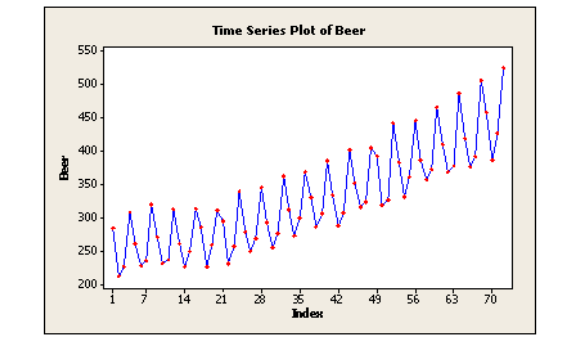

##### Example : 
- the quarterly earnings data for the Johnson and Johnson Corporations. 
- The seasonal variation increases as we move across time.
- A multiplicative decomposition could be useful. Here’s the plot of the data:
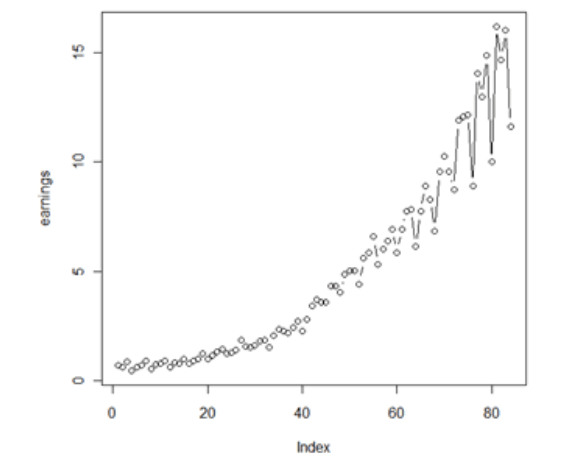

<AxesSubplot:xlabel='DATE'>

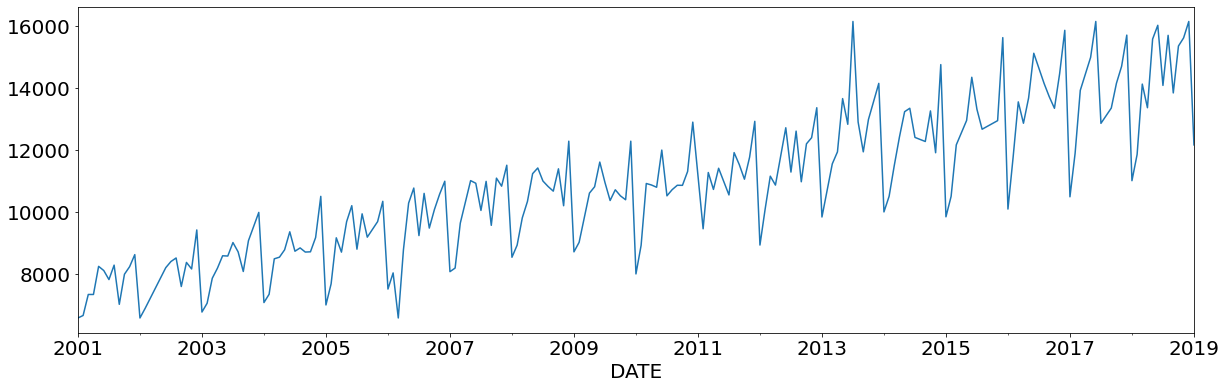

In [207]:
mobile_sales["Sales"].plot()

<AxesSubplot:xlabel='DATE'>

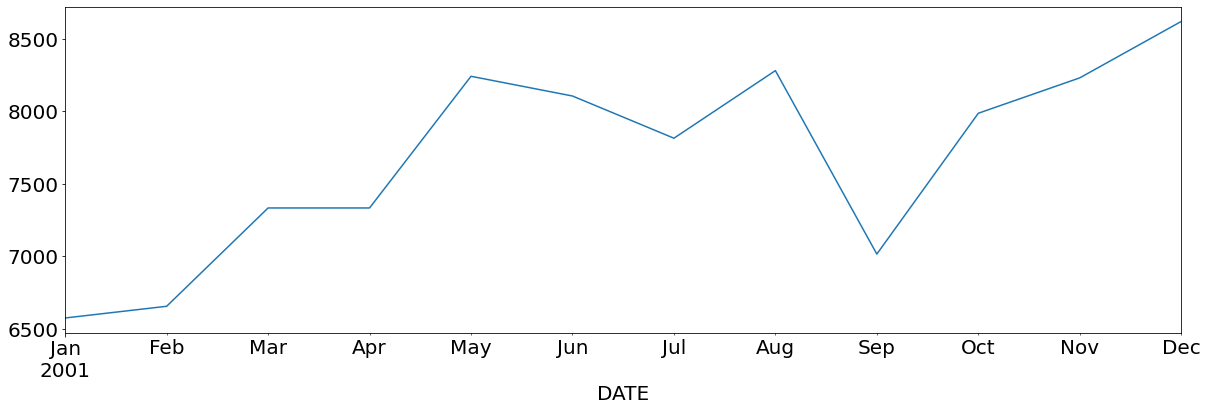

In [208]:
mobile_sales["Sales"][0:12].plot()

<AxesSubplot:xlabel='DATE'>

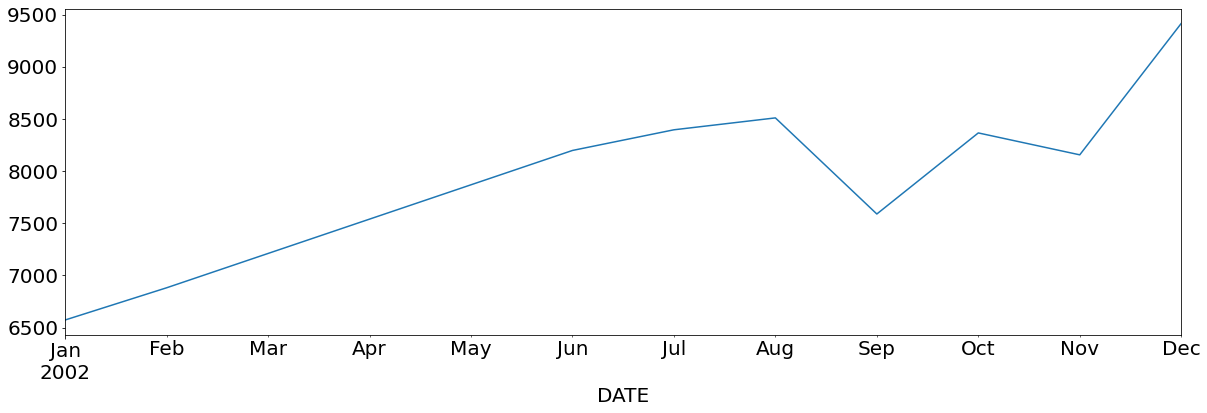

In [209]:
mobile_sales["Sales"][12:24].plot()

<AxesSubplot:xlabel='DATE'>

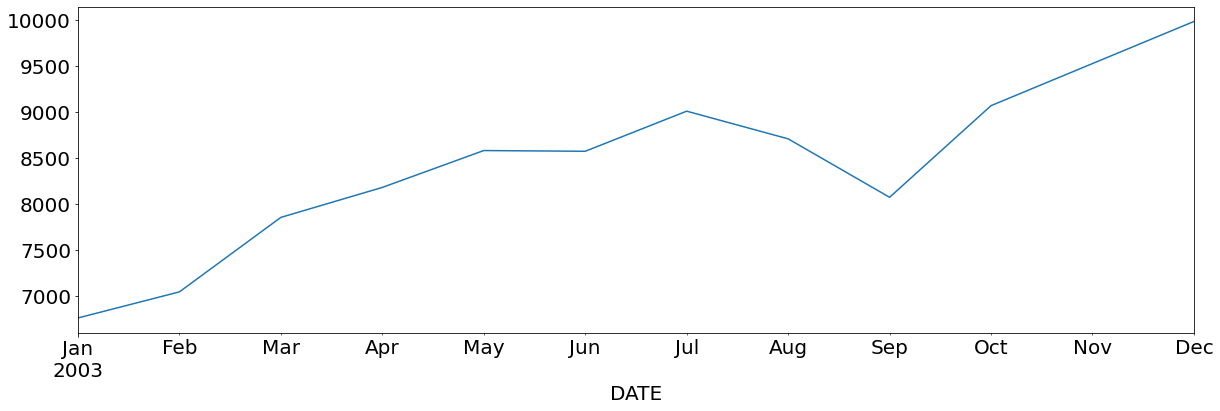

In [210]:
mobile_sales["Sales"][24:36].plot()

<AxesSubplot:xlabel='DATE'>

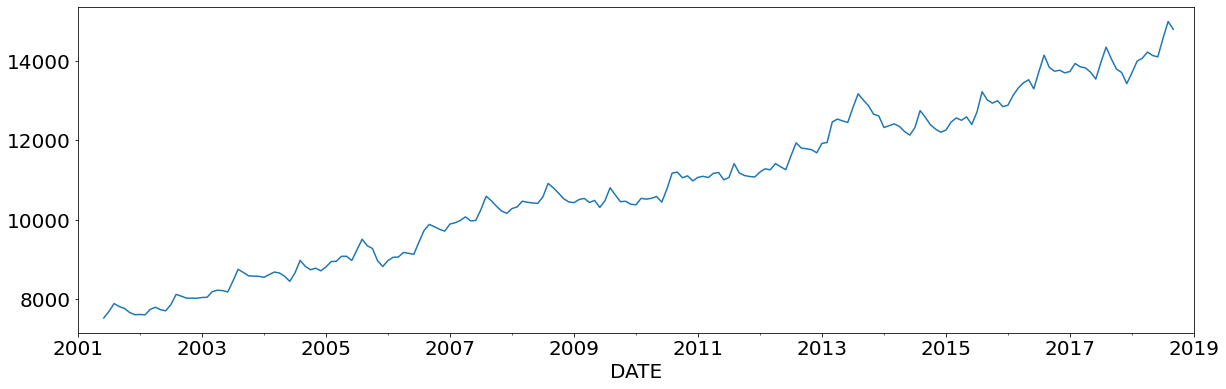

In [211]:
mobile_sales["Sales"].rolling(10,center=True).mean().plot()

##### additive model

In [212]:
import statsmodels.api as sm

In [213]:
model = sm.tsa.seasonal_decompose(mobile_sales["Sales"],model  = "additive")

In [214]:
model.nobs

(217,)

In [215]:
plt.rcParams['figure.figsize'] = (20, 15)
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
plt.rc('axes', labelsize=20)

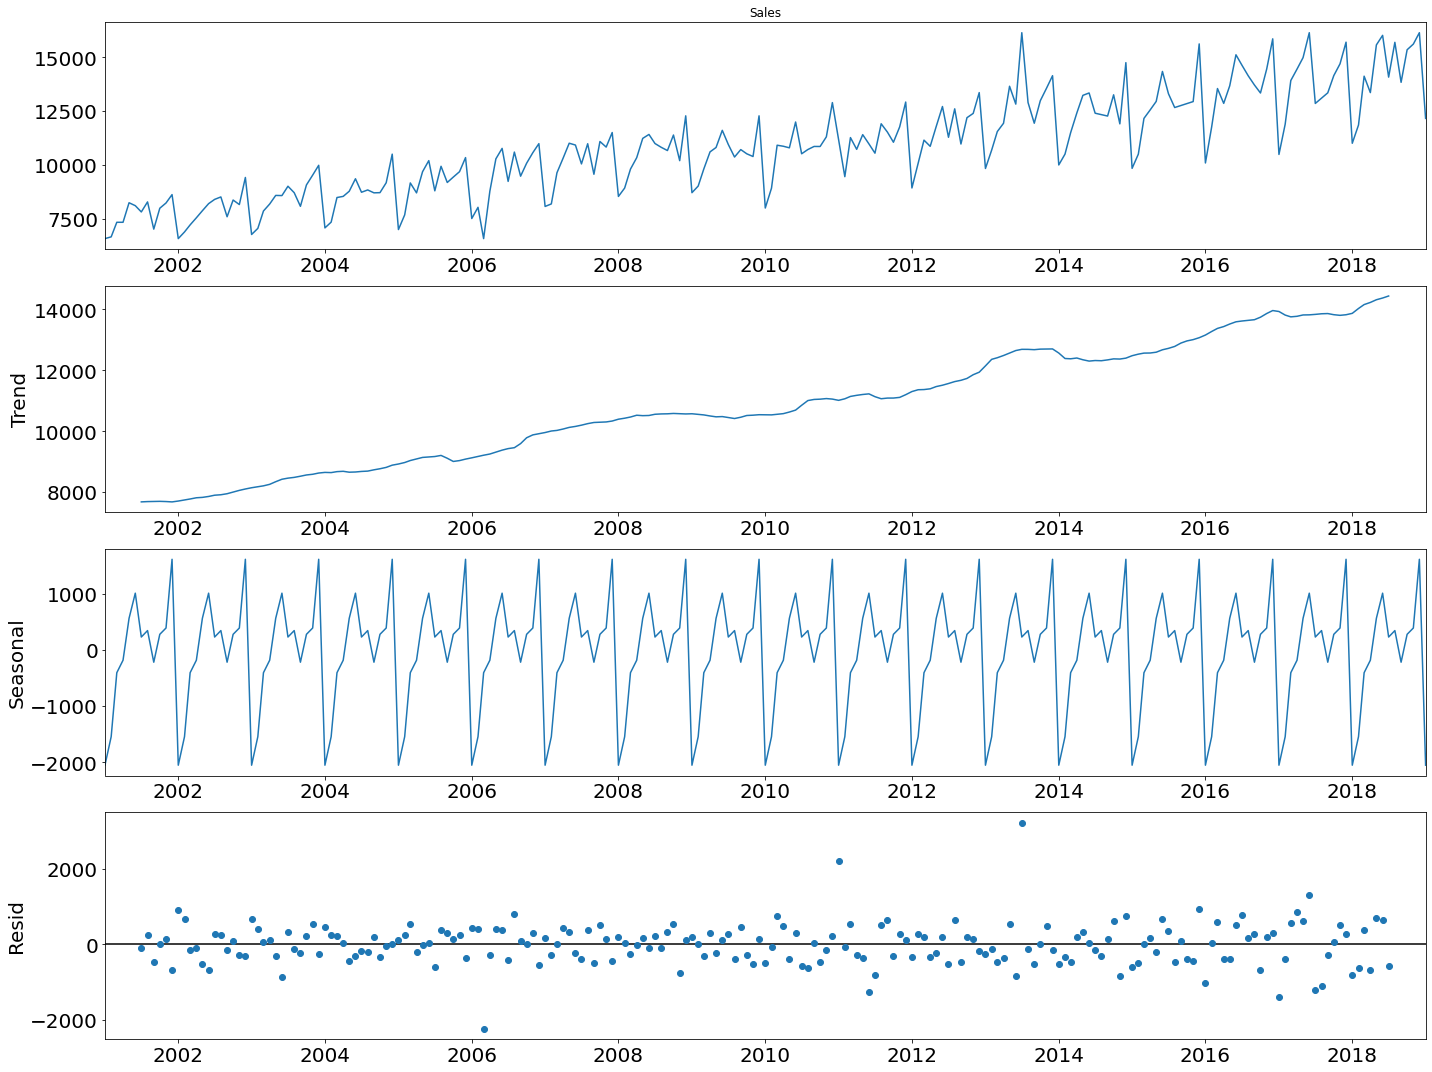

In [216]:
model.plot();
plt.show()

    y_hat(t) = trend(t)  +seasonality(t) + residual(t)
           
             = b(t) + S(t) + e(t)

        Errors : 
        
        e(t) = y(t) - b(t) - S(t)
        
        
        Error plot is a scatter plot : 
        as residual doesnt really depends on time. 
        its random. 
        
        Ideally its just a noise, it has nothing to do with time 
       

    -  if the residual plot , shows increasing with time , 
    it has a multiplicative seasonality. 
    

##### Additive: 
- = Trend + Seasonal + Residuals(error)

##### Multiplicative: 
- = Trend * Seasonal * Residuals(error)

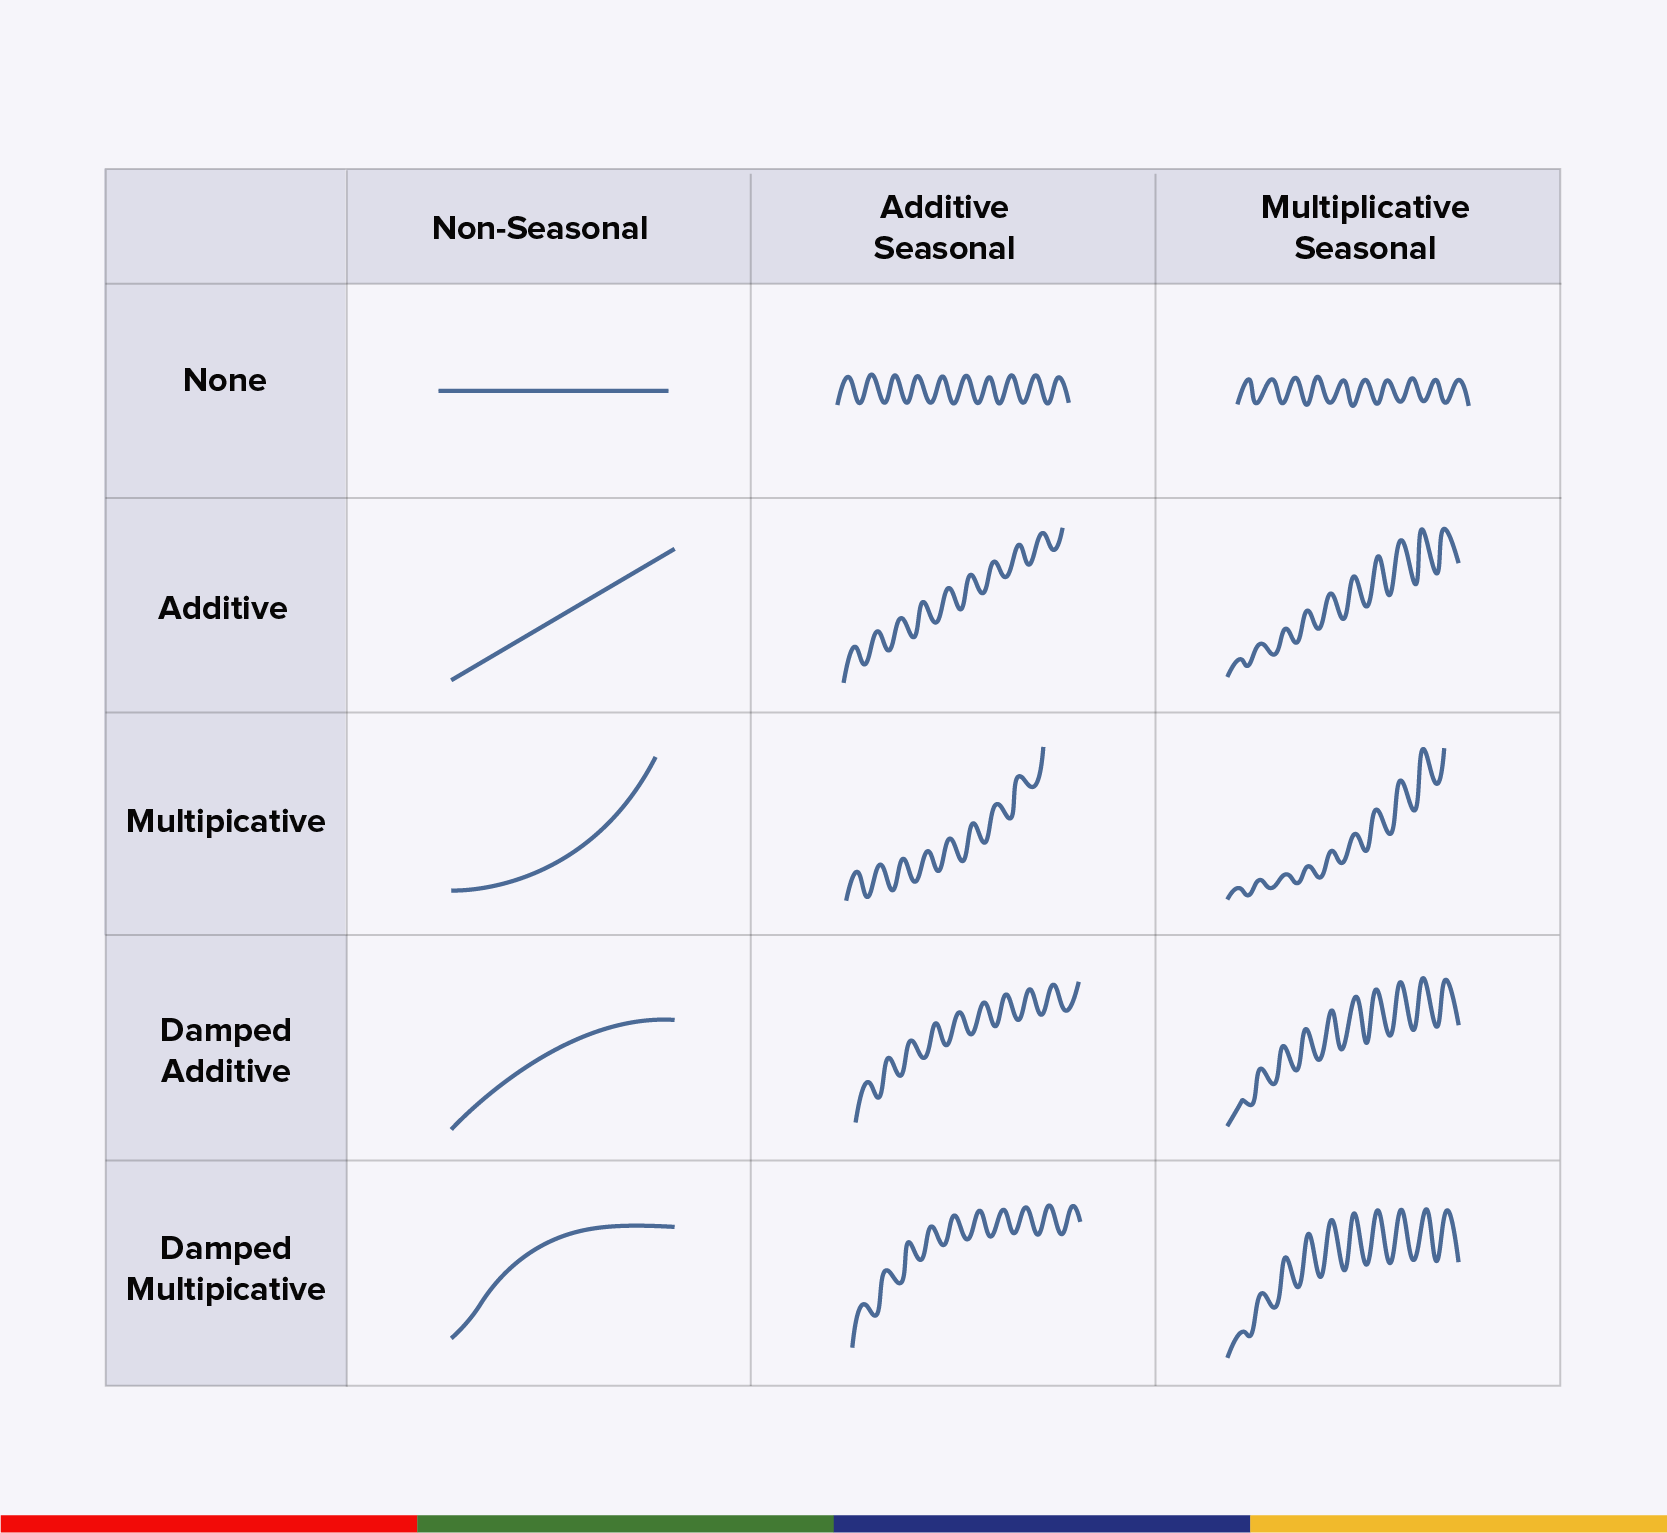

##### seasonality

<AxesSubplot:xlabel='DATE'>

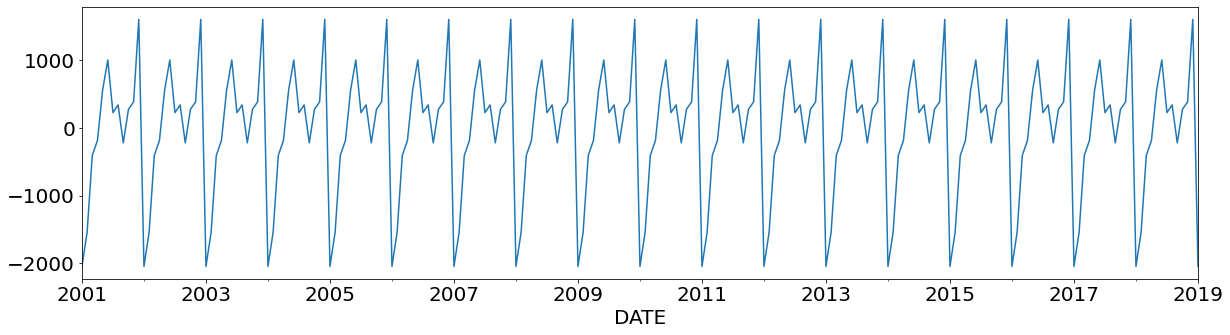

In [217]:
plt.rcParams['figure.figsize'] = (20, 5)

model.seasonal.plot()

##### trend

<AxesSubplot:xlabel='DATE'>

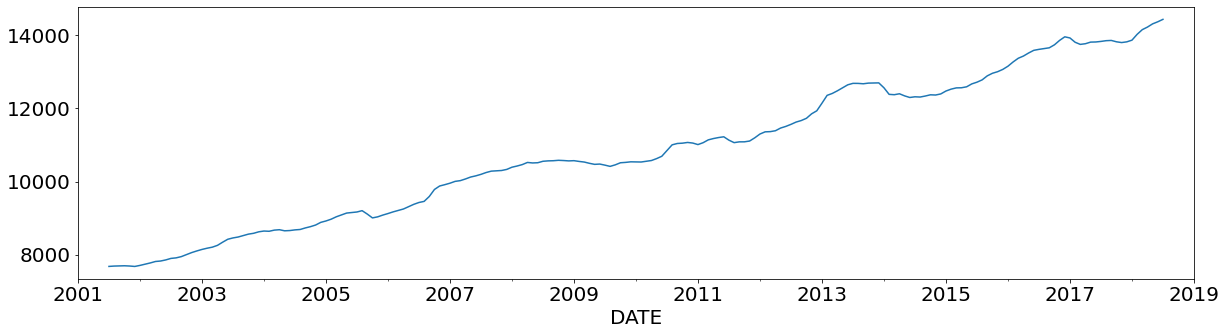

In [218]:
plt.rcParams['figure.figsize'] = (20, 5)

model.trend.plot()

##### residuals

<AxesSubplot:xlabel='DATE'>

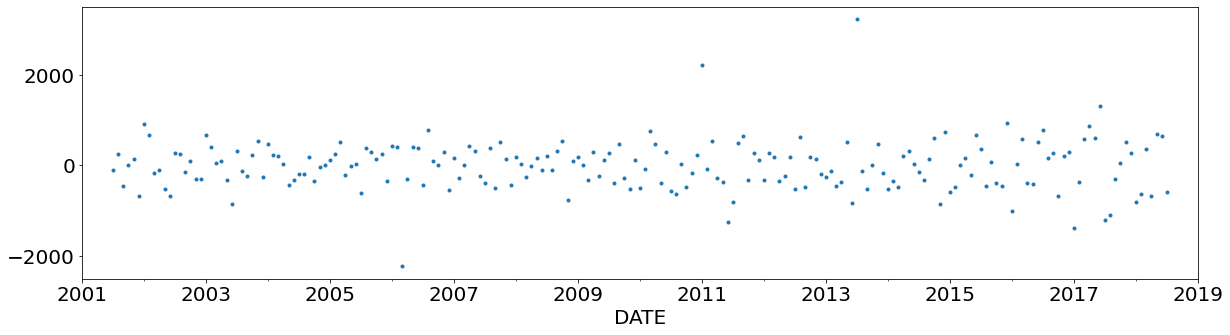

In [219]:
plt.rcParams['figure.figsize'] = (20, 5)

model.resid.plot(style=".")

In [220]:
(model.resid**2).mean()**0.5  # RMSE

551.2232849558569

##### multiplicative model

    y_hat(t) = seasonality(t) * tred(t) * residuals(t)

In [221]:
model = sm.tsa.seasonal_decompose(mobile_sales["Sales"],model  = "multiplicative")

In [222]:
plt.rcParams['figure.figsize'] = (20, 15)
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
plt.rc('axes', labelsize=20)

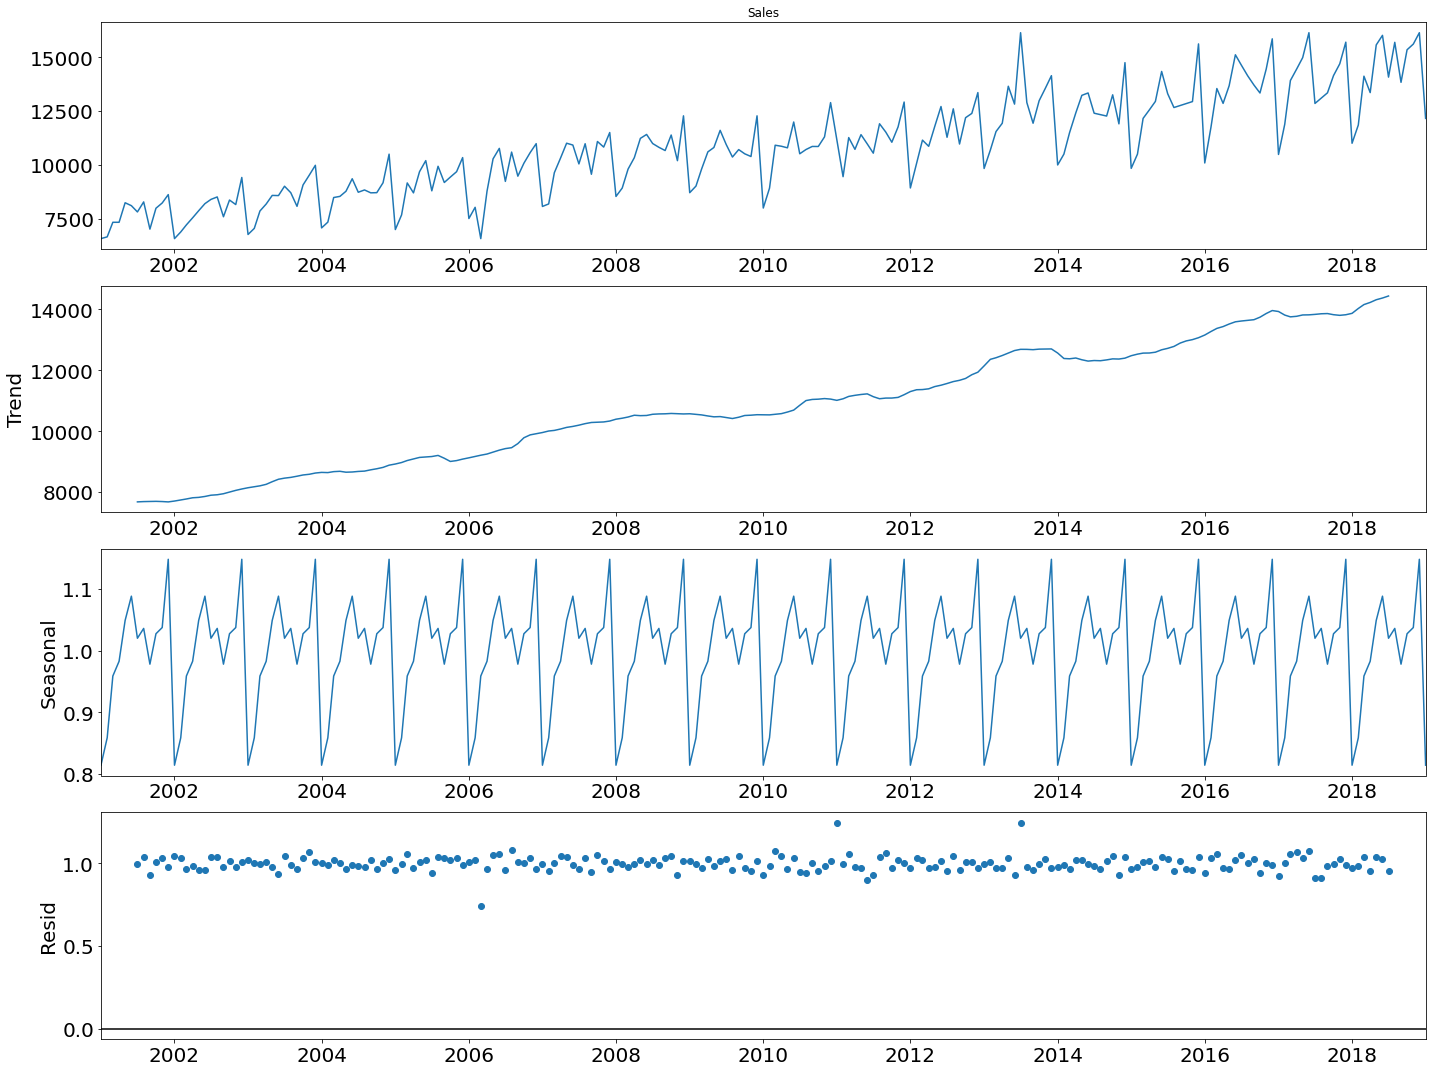

In [223]:
model.plot();
plt.show()

In [224]:
(model.resid**2).mean()**0.5  # Multiplicative residual RMSE

1.0008306586459996